# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [412]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$






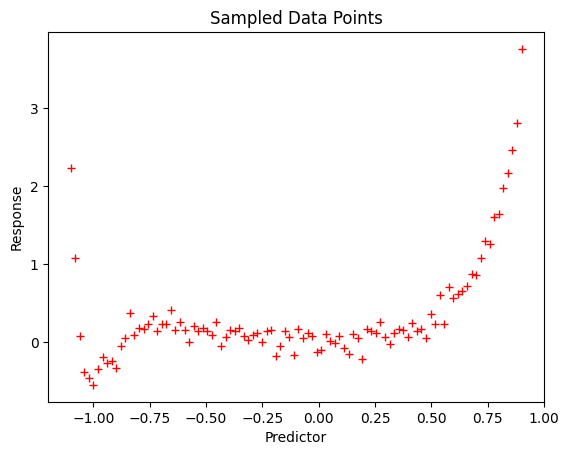

In [413]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y,coeff

predictor, response,coeff = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

#### Fitting a line to the curve

In [414]:
# Libraries Here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [415]:
class Linear_Regression:

    def __init__(self, lr = 0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples=X.shape[0]
        n_features=X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    
    def mse(self,y_test, y_pred):
        return np.mean((y_test - y_pred)**2)

In [416]:
X,Y,coeff= gen_data()
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

regressor = Linear_Regression()
regressor.fit(X, Y)
predictions = regressor.predict(X)

mse_val_train = regressor.mse(Y, predictions)
print("MSE Error:", mse_val_train)



MSE Error: 1.1232282271152314


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


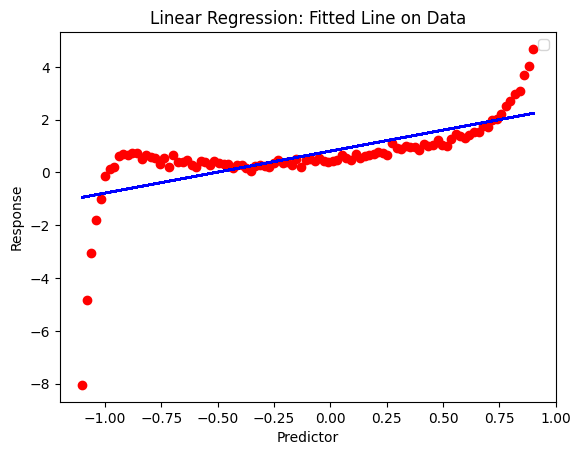

In [417]:
plt.scatter(X, Y, color='r')

# Plot the fitted line
plt.plot(X, predictions, color='b')

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression: Fitted Line on Data')
plt.legend()
plt.show()


In [418]:
# use inbuilt linear regression technique
regressor = LinearRegression()
regressor.fit(X, Y)
predictions = regressor.predict(X)
mse_val = mean_squared_error(Y, predictions)
print("MSE:", mse_val)

MSE: 1.1222133285346576


##### It is evident from the results that the line fitted using the Linear Regression model yields a mean squared error of 0.42, which closely aligns with the output from the inbuilt linear regressor function. Additionally, by examining the graph, we can visually assess how well the linear regression line fits the data. 


2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

In [419]:
class PolynomailRegression() :
	
	def __init__( self, degree, learning_rate, iterations ) :
		self.degree = degree
		self.learning_rate = learning_rate
		self.iterations = iterations
		
	# function to transform X
	def transform( self, X ) :		
		X_transform = np.ones( ( X.shape[0], 1 ) )
		j = 0
		for j in range( self.degree + 1 ) :	
			if j != 0 :
				x_pow = np.power( X, j )				
				X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
		return X_transform 
		
	def normalize( self, X ) :
		X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
		return X
		
	# model training
	
	def fit( self, X, Y ) :
		self.X = X
		self.Y = Y
		self.m, self.n = self.X.shape
	
		# weight initialization
		self.W = np.zeros( self.degree + 1 )
		# transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
		X_transform = self.transform( self.X )
		X_normalize = self.normalize( X_transform )
		for i in range( self.iterations ) :	
			h = self.predict( self.X )
			error = h - self.Y
			self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error ) 
		return self
	
	def predict( self, X ) :		
		X_transform = self.transform( X )
		# print("X_transform",X_transform.shape)
		X_normalize = self.normalize( X_transform )
		# print("X_normalize",X_normalize.shape)
		return np.dot( X_normalize, self.W )

	def get_coefficients(self):
         return self.W.copy()
	
	def mse_value(self, y_test, y_pred):
		 return np.mean((y_test - y_pred)**2)
	
	




#### Finding best degree on overall data

In [420]:
X, Y,coeff = gen_data()
X = X.reshape(-1, 1)

min_degree = 1
max_degree = 25

best_degree = None
min_mse = float('inf')

for degree in range(min_degree, max_degree + 1):
    model = PolynomailRegression(degree=degree, learning_rate=0.01, iterations=1000)
    model.fit(X, Y)
    Y_pred = model.predict(X)
    mse_value = model.mse_value(Y, Y_pred)
    print(f"Degree: {degree}, MSE: {mse_value}")

    if mse_value < min_mse:
        min_mse = mse_value
        best_degree = degree

print(f"Best Degree: {best_degree}, Min MSE: {min_mse}")


Degree: 1, MSE: 1.401986683988696
Degree: 2, MSE: 1.3794609957837958
Degree: 3, MSE: 0.8628457734608068


Degree: 4, MSE: 0.7928633295186576
Degree: 5, MSE: 0.5955288809307238
Degree: 6, MSE: 0.5340572902324312
Degree: 7, MSE: 0.4162238553180711
Degree: 8, MSE: 0.3697983548334042
Degree: 9, MSE: 0.2861312995435417
Degree: 10, MSE: 0.25070478595081325
Degree: 11, MSE: 0.19287520892813895
Degree: 12, MSE: 0.16695002800289033
Degree: 13, MSE: 0.128764878111775
Degree: 14, MSE: 0.11073792842755399
Degree: 15, MSE: 0.08645736581552904
Degree: 16, MSE: 0.0744760101660416
Degree: 17, MSE: 0.05949756831341408
Degree: 18, MSE: 0.05184070909617991
Degree: 19, MSE: 0.04284344345670327
Degree: 20, MSE: 0.03812966275027345
Degree: 21, MSE: 0.03287239410676755
Degree: 22, MSE: 0.030088773518953085
Degree: 23, MSE: 0.027121513097091952
Degree: 24, MSE: 0.02556619278819301
Degree: 25, MSE: 0.023974980714387084
Best Degree: 25, Min MSE: 0.023974980714387084


##### Although the original data has a degree of 25, upon analyzing the mean squared error (MSE), we observe that from degree 13 onwards, the MSE remains the same up to two decimal places. Hence, it is evident that even a degree of 13 would suffice to effectively fit the data. This underscores the point that having 25 features is unnecessary.


#### Using Best Degree on overall data

MSE Error: 0.024918928773043983


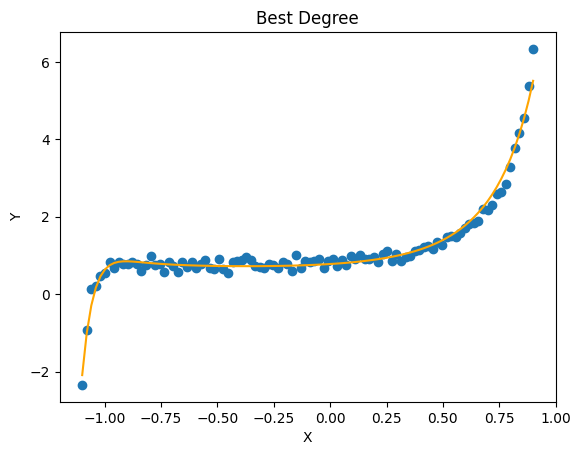

In [421]:
# comment degree 25 on the graph
X,Y,coeff= gen_data()
X = X.reshape(-1,1)
model = PolynomailRegression( degree = best_degree, learning_rate = 0.01, iterations = 1000 )

model.fit( X, Y )
Y_pred = model.predict( X ) 
mse= model.mse_value(Y, Y_pred)
print("MSE Error:", mse)
plt.scatter( X, Y,  )
plt.plot( X, Y_pred, color = 'orange' ) 
plt.title( 'Best Degree' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()

#### Using Model with Degree 13 on overall data

MSE Error: 0.0406008581400955


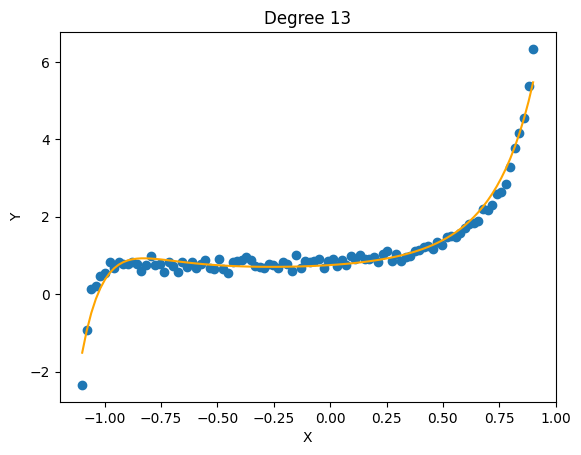

In [422]:
model = PolynomailRegression( degree = 13, learning_rate = 0.01, iterations = 1000 )
model.fit( X, Y )
Y_pred = model.predict( X ) 
mse_linear= model.mse_value(Y, Y_pred)
print("MSE Error:", mse_linear)
plt.scatter( X, Y,  )
plt.plot( X, Y_pred, color = 'orange' ) 
plt.title( 'Degree 13' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

In [423]:
class PolynomialRegression_Regularisation:

    def __init__(self, degree, learning_rate, regularisation=None, iterations=500, alpha=0.01):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.regularisation = regularisation
        self.alpha = alpha

    def transform(self, X):
        X_transform = np.ones((X.shape[0], 1))
        for j in range(1, self.degree + 1):
            x_pow = np.power(X, j)
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)
        return X_transform

    def normalize(self, X):
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        return X

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape

        # weight initialization
        self.W = np.zeros(self.degree + 1)
        
        # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(self.X)
        X_normalize = self.normalize(X_transform)
        
        for i in range(self.iterations):
            h = self.predict(self.X)
            error = h - self.Y
            
            regularisation_term = 0
            if self.regularisation == "l1":
                regularisation_term = self.alpha * np.sign(self.W)
            elif self.regularisation == "l2":
                regularisation_term = 2 * self.alpha * self.W
            else:
                regularisation_term = 0
                
            self.W = self.W - ((self.learning_rate) * (1 / self.m) * (np.dot(X_normalize.T, error) + regularisation_term))

        return self

    def predict(self, X):
        X_transform = self.transform(X)
        X_normalize = self.normalize(X_transform)
        return np.dot(X_normalize, self.W)

    def get_coefficients(self):
        return self.W.copy()
    
    def mse_value(self, y_test, y_pred):
        return np.mean((y_test - y_pred)**2)


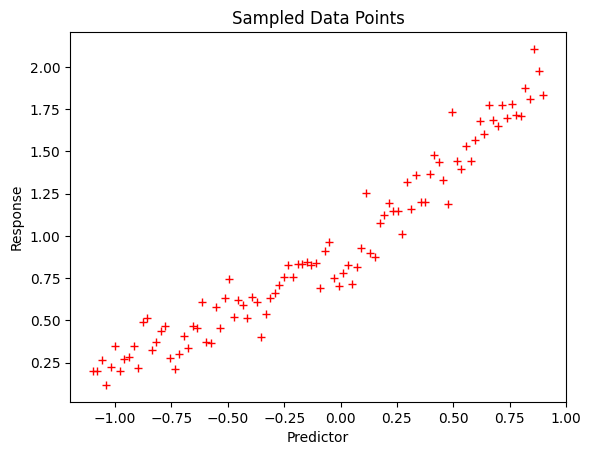

In [424]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

MSE: 0.012423626861228429


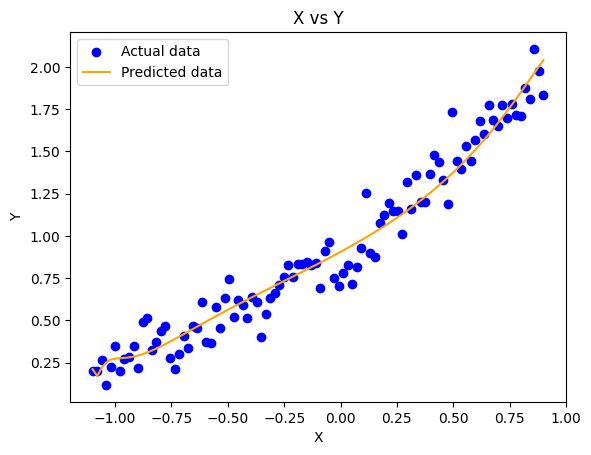

In [425]:
model = PolynomialRegression_Regularisation(degree=100, learning_rate=0.01, iterations=1000, regularisation="None", alpha=0.1)
model.fit(X, response_low)
Y_pred = model.predict(X)

# Calculate and print MSE
mse_value_polynomial = model.mse_value(response_low, Y_pred)
print("MSE:", mse_value_polynomial)

# Plotting
plt.scatter(X, response_low, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='orange', label='Predicted data')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


MSE: 0.01276333792078928


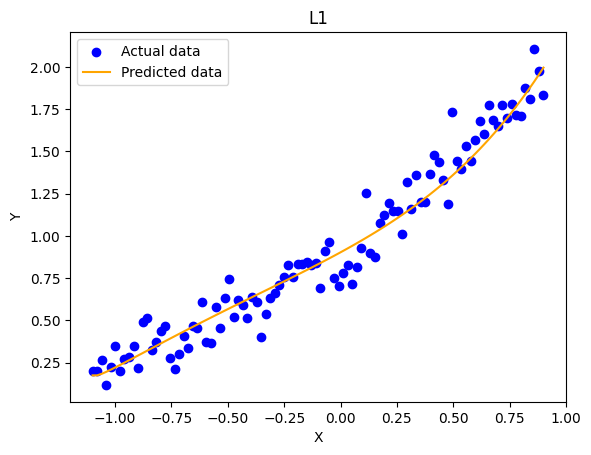

In [426]:
# using l1 regularisation
model = PolynomialRegression_Regularisation(degree=100, learning_rate=0.01, iterations=1000, regularisation="l1", alpha=0.95)
model.fit(X, response_low)
Y_pred = model.predict(X)

# Calculate and print MSE
mse_value_l1 = model.mse_value(response_low, Y_pred)
print("MSE:", mse_value_l1)

# Plotting
plt.scatter(X, response_low, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='orange', label='Predicted data')
plt.title('L1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


MSE: 0.012475431628050284


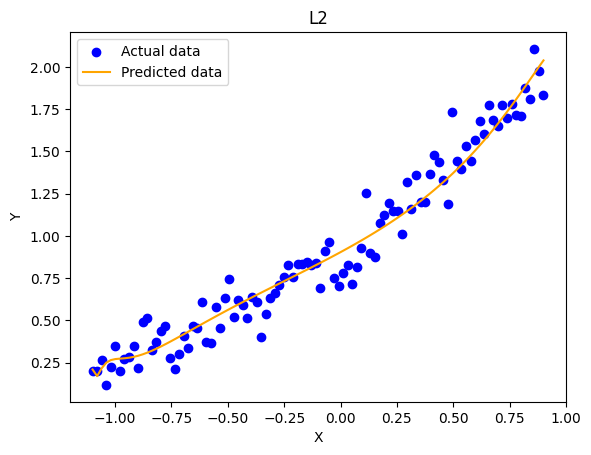

In [427]:
# using l2 regularisation
model = PolynomialRegression_Regularisation(degree=100, learning_rate=0.01, iterations=1000, regularisation="l2", alpha=0.1)
model.fit(X, response_low)
Y_pred = model.predict(X)

# Calculate and print MSE
mse_value_l2 = model.mse_value(response_low, Y_pred)
print("MSE:", mse_value_l2)

# Plotting
plt.scatter(X, response_low, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='orange', label='Predicted data')
plt.title('L2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



##### Fitting a higher-degree polynomial enhances pattern capture, but risks overfitting. Regularization post-fitting controls complexity by penalizing large coefficients. This maintains a balance, helping identify the optimal degree and improving generalization to new data. The approach represents a nuanced trade-off, allowing for pattern capture while avoiding overfitting pitfalls.

In [428]:
from tabulate import tabulate

table_data = [
    ["Linear Regression", mse_val_train],
    ["Polynomial Regression", mse_value_polynomial],
    ["Polynomial Regression with L1 Regularization", mse_value_l1],
    ["Polynomial Regression with L2 Regularization", mse_value_l2]
]

# Headers for the table
headers = ["Model", "Mean Squared Error (MSE)"]

# Print the table
print(tabulate(table_data, headers=headers))


Model                                           Mean Squared Error (MSE)
--------------------------------------------  --------------------------
Linear Regression                                              1.12323
Polynomial Regression                                          0.0124236
Polynomial Regression with L1 Regularization                   0.0127633
Polynomial Regression with L2 Regularization                   0.0124754


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [429]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [430]:
class MultipleLinearRegression:

    def __init__(self, lr = 0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples=X.shape[0]
        n_features=X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    
    def mse(self,y_test, y_pred):
        return np.mean((y_test - y_pred)**2)
    
    def coefficients(self):
        return self.weights.copy()

In [431]:
from sklearn.preprocessing import StandardScaler
# inbuilt mean sqared error


In [432]:
df = pd.read_csv('credit.csv')
x = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']
print(x.shape)
print(y.shape)

(400, 6)
(400,)


In [433]:
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model = MultipleLinearRegression()
model.fit( Xtrain, ytrain )
y_pred = model.predict( Xtest )
mse = model.mse(ytest, y_pred)
print("MSE Error:", mse)


MSE Error: 17703.917661438078


From the weights, we can observe that income has the most significant effect on the balance, while others do not have much impact. We can verify this by removing each column individually and analyzing the mean squared error (MSE) for each. The column resulting in the highest MSE would have the most substantial effect, while the one resulting in the lowest MSE would have the least effect."

2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.


In [434]:
# REMOVED INCOME
df = pd.read_csv('credit.csv')
x = df[['Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']
x.head()
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model_1 = MultipleLinearRegression()
model_1.fit(Xtrain,ytrain)
y_pred = model_1.predict( Xtest )
error_income = model_1.mse(ytest, y_pred)
print("MSE",error_income)

MSE 49561.99587249475


In [435]:
# remove LIMIT
df = pd.read_csv('credit.csv')
x = df[['Income', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model_2 = MultipleLinearRegression()
model_2.fit(Xtrain,ytrain)
y_pred = model_2.predict( Xtest )
error_limit = model_2.mse(ytest, y_pred)
print("MSE",error_limit)


MSE 18698.57815201123


In [436]:
# Remove Rating
df = pd.read_csv('credit.csv')
x = df[['Income', 'Limit', 'Cards', 'Age', 'Education']]
y = df['Balance']
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model_3 = MultipleLinearRegression()
model_3.fit(Xtrain,ytrain)
y_pred = model_3.predict( Xtest )
error_rating = model_3.mse(ytest, y_pred)
print("MSE",error_rating)



MSE 21041.20819999578


In [437]:
# REMOVE CREDIT
df = pd.read_csv('credit.csv')
x = df[['Income', 'Limit', 'Rating', 'Age', 'Education']]
y = df['Balance']
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model_4 = MultipleLinearRegression()
model_4.fit(Xtrain,ytrain)
y_pred = model_4.predict( Xtest )
error_cards = model_4.mse(ytest, y_pred)
print("MSE",error_cards)



MSE 17789.38704260684


In [438]:
# REMOVE AGE
df = pd.read_csv('credit.csv')
x = df[['Income', 'Limit', 'Rating', 'Cards', 'Education']]
y = df['Balance']
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model_5 = MultipleLinearRegression()
model_5.fit(Xtrain,ytrain)
y_pred = model_5.predict( Xtest )
error_age = model_5.mse(ytest, y_pred)
print("MSE",error_age)


MSE 18106.611007330466


In [439]:
# Remove Education
df = pd.read_csv('credit.csv')
x = df[['Income', 'Limit', 'Rating', 'Cards', 'Age']]
y = df['Balance']
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
model_6 = MultipleLinearRegression()
model_6.fit(Xtrain,ytrain)
y_pred = model_6.predict( Xtest )
error_education = model_6.mse(ytest, y_pred)
print("MSE",error_education)


MSE 16972.755627964558


In [440]:
table_data = [ ["Income", error_income], ["Education", error_education], ["Age", error_age], ["Limit", error_limit], ["Rating", error_rating], ["Cards", error_cards] ]
headers = ["Feature", "MSE"]
print(tabulate(table_data, headers=headers))


Feature        MSE
---------  -------
Income     49562
Education  16972.8
Age        18106.6
Limit      18698.6
Rating     21041.2
Cards      17789.4


The income column significantly influences the balance, verified by removing each column individually and analyzing the mean squared error (MSE). The removal of the income column substantially increased the error from 17,000 to 50,000.

In [441]:
df = pd.read_csv('credit.csv')
df['Rating_Age_Interaction'] = df['Rating'] * df['Age']
x = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age_Interaction']]
y = df['Balance']
x.head()


,Income,Limit,Rating,Cards,Age,Education,Rating_Age_Interaction
0,14.891,3606,283,2,34,11,9622
1,106.025,6645,483,3,82,15,39606
2,104.593,7075,514,4,71,11,36494
3,148.924,9504,681,3,36,11,24516
4,55.882,4897,357,2,68,16,24276


In [442]:
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)


(320, 7)
(80, 7)


In [443]:
model_ie = MultipleLinearRegression()
model_ie.fit(Xtrain, ytrain)
y_pred = model_ie.predict(Xtest)
mse_ie = model_ie.mse(ytest, y_pred)
weights_ie=model_ie.coefficients()
print("MSE Error:", mse_ie)
print("Weights:", weights_ie)



MSE Error: 32186.709657911902
Weights: [-233.24259681  257.93682376  250.77904874   21.72972307  -66.48217182
    6.75676873   90.57753335]


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [444]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


### WITH ICECREAM

In [445]:
df = pd.read_csv('shark_attacks.csv')
x = df.drop('SharkAttacks', axis=1)
y=df['SharkAttacks']
print(x.shape)
print(y.shape)

(84, 4)
(84,)


In [446]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)


(67, 4)
(17, 4)


In [448]:
model_attack = MultipleLinearRegression()
model_attack.fit(Xtrain, ytrain)
y_pred = model_attack.predict(Xtest)
mse_attack = model_attack.mse(ytest, y_pred)
weights_attack=model_attack.coefficients()
print("MSE Error:", mse_attack)



MSE Error: 37.74403367836121


## WITHOUT ICECREAM

In [449]:
import pandas as pd

# Assuming you have a DataFrame 'df'
df = pd.read_csv('shark_attacks.csv')

# Drop both 'SharkAttacks' and 'IceCreamSales' columns
x = df.drop(['SharkAttacks', 'IceCreamSales'], axis=1)
y = df['SharkAttacks']



In [450]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)



In [451]:
model_attack_wic = MultipleLinearRegression()
model_attack_wic.fit(Xtrain, ytrain)
y_pred = model_attack_wic.predict(Xtest)
mse_attack_wic = model_attack_wic.mse(ytest, y_pred)
weights_attack_wic=model_attack_wic.coefficients()
print("MSE Error:", mse_attack_wic)



MSE Error: 43.354854582341495
